# How to plot mathematical expressions and symbols in vcs?

VCS can take advantage of matolotlib's text capabilites, this Jupyter notebook essentially shows how to implement in vcs [the following matplolib tutorial](https://matplotlib.org/users/mathtext.html)

You can use a subset TeX markup in any vcs text string by placing it inside a pair of dollar signs ($).

Note that you do not need to have TeX installed, since matplotlib ships its own TeX expression parser, layout engine and fonts. The layout engine is a fairly direct adaptation of the layout algorithms in Donald Knuth’s TeX, so the quality is quite good.

Any text element can use math text. You should use raw strings (precede the quotes with an 'r'), and surround the math text with dollar signs ($), as in TeX. Regular text and mathtext can be interleaved within the same string. Mathtext can use DejaVu Sans (default), DejaVu Serif, the Computer Modern fonts (from (La)TeX), STIX fonts (with are designed to blend well with Times), or a Unicode font that you provide. The mathtext font can be selected with the customization variable mathtext.fontset [see Customizing matplotlib](https://matplotlib.org/users/customizing.html#customizing-matplotlib)

Simple example

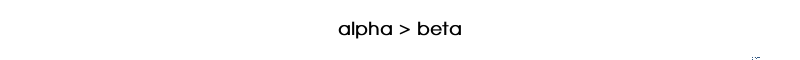

In [1]:
import vcs
x=vcs.init(bg=True, geometry=(800,60))
# Convenience function for later in the script
def update():
    x.clear()
    return x.plot(text)

text = vcs.createtext()
# Position string
text.x = [.5]
text.y = [.5]
text.halign = "center"
text.valign = "half"
text.height = 250
text.string = "alpha > beta"
x.plot(text)

produces “alpha > beta”.

Whereas this:

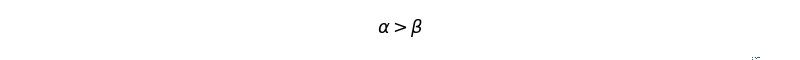

In [2]:
# mathematical text
text.string = r"$\alpha > \beta$"
update()

**Note**

Mathtext should be placed between a pair of dollar signs (\$). To make it easy to display monetary values, e.g., “$100.00”, if a single dollar sign is present in the entire string, it will be displayed verbatim as a dollar sign. This is a small change from regular TeX, where the dollar sign in non-math text would have to be escaped (‘\$’).

**Note**

While the syntax inside the pair of dollar signs (\$) aims to be TeX-like, the text outside does not. In particular, characters such as:
```
# $ % & ~ _ ^ \ { } ( ) [ ]
```
have special meaning outside of math mode in TeX. Therefore, these characters will behave differently depending on the rcParam text.usetex flag. See the usetex tutorial for more information.

## Subscripts and superscripts

To make subscripts and superscripts, use the '_' and '^' symbols:

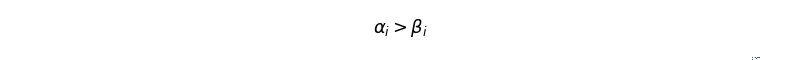

In [3]:
text.string = r"$\alpha_i > \beta_i$"
update()

Some symbols automatically put their sub/superscripts under and over the operator.

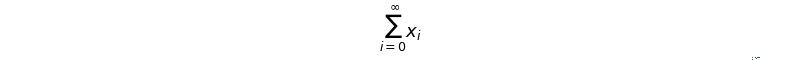

In [4]:
text.string = r'$\sum_{i=0}^\infty x_i$'
update()

## Fractions, binomials and stacked numbers
Fractions, binomials and stacked numbers can be created with the \frac{}{}, \binom{}{} and \stackrel{}{} commands, respectively:

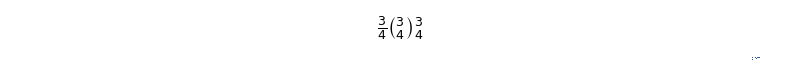

In [5]:
text.string=r'$\frac{3}{4} \binom{3}{4} \stackrel{3}{4}$'
update()

Fractions can be arbitrarily nested:

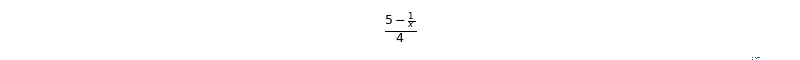

In [6]:
text.string=r'$\frac{5 - \frac{1}{x}}{4}$'
update()

Note that special care needs to be taken to place parentheses and brackets around fractions. Doing things the obvious way produces brackets that are too small:

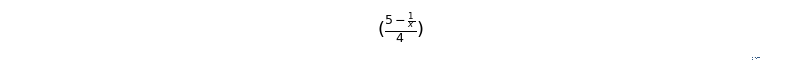

In [7]:
text.string = r'$(\frac{5 - \frac{1}{x}}{4})$'
update()

The solution is to precede the bracket with \left and \right to inform the parser that those brackets encompass the entire object:

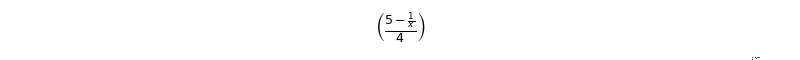

In [8]:
text.string = r'$\left(\frac{5 - \frac{1}{x}}{4}\right)$'
update()

## Radicals
Radicals can be produced with the \sqrt[]{} command. For example:

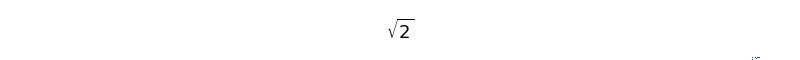

In [9]:
text.string = r'$\sqrt{2}$'
update()

Any base can (optionally) be provided inside square brackets. Note that the base must be a simple expression, and can not contain layout commands such as fractions or sub/superscripts:

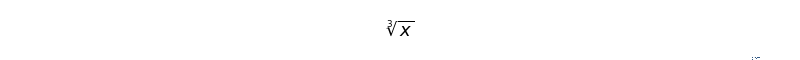

In [10]:
text.string = r'$\sqrt[3]{x}$'
update()

## Fonts
The default font is italics for mathematical symbols.

**Note**
This default can be changed using the mathtext.default rcParam. This is useful, for example, to use the same font as regular non-math text for math text, by setting it to regular.
To change fonts, e.g., to write “sin” in a Roman font, enclose the text in a font command:

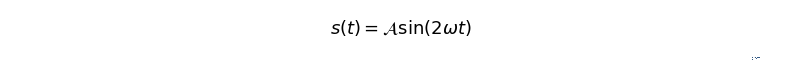

In [11]:
text.string = r'$s(t) = \mathcal{A}\mathrm{sin}(2 \omega t)$'
update()

More conveniently, many commonly used function names that are typeset in a Roman font have shortcuts. So the expression above could be written as follows:

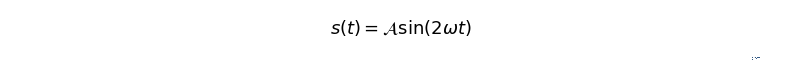

In [12]:
text.string = r'$s(t) = \mathcal{A}\sin(2 \omega t)$'
update()

Here “s” and “t” are variable in italics font (default), “sin” is in Roman font, and the amplitude “A” is in calligraphy font. Note in the example above the caligraphy A is squished into the sin. You can use a spacing command to add a little whitespace between them:

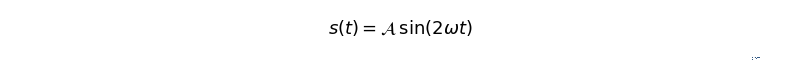

In [13]:
text.string = r"$s(t) = \mathcal{A}\/\sin(2 \omega t)$"
update()

The choices available with all fonts are:

|Command|Result |
|:------|------:|
| \mathrm{Roman}     |   $\mathrm{Roman}$   |
|\mathit{Italic}| $\mathit{Italic}$ |	
|\mathtt{Typewriter} | $\mathtt{Typewriter}$ |	
|\mathcal{CALLIGRAPHY} | $\mathcal{CALLIGRAPHY}$ |

When using the STIX fonts, you also have the choice of:

|Command|Result|
|:------|------:|
|\mathbb{blackboard}| $\mathbb{blackboard}$ |
|\mathrm{\mathbb{blackboard}}| $\mathrm{\mathbb{blackboard}}$ |
|\mathfrak{Fraktur}| $\mathfrak{Fraktur}$ |
|\mathsf{sansserif}| $\mathsf{sansserif}$ |
|\mathrm{\mathsf{sansserif}}| $\mathrm{\mathsf{sansserif}}$ |
|\mathcircled{circled}| $\mathcircled{circled}$ |

Additionally, you can use \mathdefault{...} or its alias \mathregular{...} to use the font used for regular text outside of mathtext. There are a number of limitations to this approach, most notably that far fewer symbols will be available, but it can be useful to make math expressions blend well with other text in the plot.

## Custom fonts

mathtext also provides a way to use custom fonts for math. This method is fairly tricky to use, and should be considered an experimental feature for patient users only. By setting the rcParam mathtext.fontset to custom, you can then set the following parameters, which control which font file to use for a particular set of math characters.

|Parameter|Corresponds to|
|:--------|--------:|
|mathtext.it|\mathit{} or default italic|
|mathtext.rm|\mathrm{} Roman (upright)|
|mathtext.tt|\mathtt{} Typewriter (monospace)|
|mathtext.bf|\mathbf{} bold italic|
|mathtext.cal|\mathcal{} calligraphic|
|mathtext.sf|\mathsf{} sans-serif|

Each parameter should be set to a fontconfig font descriptor (as defined in the yet-to-be-written font chapter).

The fonts used should have a Unicode mapping in order to find any non-Latin characters, such as Greek. If you want to use a math symbol that is not contained in your custom fonts, you can set the rcParam mathtext.fallback_to_cm to True which will cause the mathtext system to use characters from the default Computer Modern fonts whenever a particular character can not be found in the custom font.

Note that the math glyphs specified in Unicode have evolved over time, and many fonts may not have glyphs in the correct place for mathtext.

## Accents

An accent command may precede any symbol to add an accent above it. There are long and short forms for some of them.

|Command|Result|
|:------|------:|
|\acute a or \'a| $\acute a$ |	
|\bar a| $\bar a$|
|\breve a| $\breve a$|
|\ddot a or \"a| $\ddot a$|
|\dot a or \.a|$\dot a$|
|\grave a or \`a| $\grave a$|
|\hat a or \^a|$\hat a$|
|\tilde a or \~a|$\tilde a$|
|\vec a| $\vec a$|
|\overline{abc}| $\overline{abc}$|

In addition, there are two special accents that automatically adjust to the width of the symbols below:

|Command|Result|
|:------|------:|
|\widehat{xyz}| $\widehat{xyz}$|
|\widetilde{xyz}| $\widetilde{xyz}$ |

Care should be taken when putting accents on lower-case i’s and j’s. Note that in the following \imath is used to avoid the extra dot over the i:

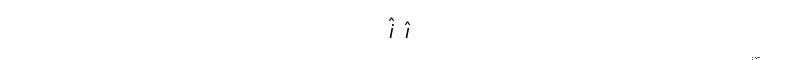

In [14]:
text.string = r"$\hat i\ \ \hat \imath$"
update()

# Symbols

You can also use a large number of the TeX symbols, as in \infty, \leftarrow, \sum, \int.

Lower-case Greek

|Command|Result|
|:------|------:|
|\alpha |$\alpha$|
|\beta| $\beta$|
|\chi| $\chi$|
|\delta| $\delta$|
|\digamma| $\digamma$|
|\epsilon |$\epsilon$|
|\eta |$\eta$|
|\gamma| $\gamma$|
|\iota |$\iota$ |
|\kappa |$\kappa$|
|\lambda |$\lambda$|
|\mu |$\mu$|
|\nu| $\nu$|
|\omega |$\omega$|
|\phi| $\phi$|
|\pi |$\pi$|
|\psi| $\psi$|
|\rho |$\rho$|
|\sigma |$\sigma$|
|\tau| $\tau$|
|\theta |$\theta$|
|\upsilon| $\upsilon$|
|\varepsilon |$\varepsilon$|
|\varkappa |$\varkappa$|
|\varphi| $\varphi$|
|\varpi| $\varpi$|
|\varrho |$\varrho$|
|\varsigma| $\varsigma$|
|\vartheta| $\vartheta$|
|\xi| $\xi$|
|\zeta |$\zeta$|
 

Upper-case Greek

|Command|Result|
|:------|------:|
|\Delta | $\Delta$|  
|\Gamma |$\Gamma$  |
|\Lambda| $\Lambda$ | 
|\Omega| $\Omega$|  
|\Phi |$\Phi$ | 
|\Pi| $\Pi$|
|\Psi |$\Psi$  |
|\Sigma |$\Sigma$  |
|\Theta |$\Theta$  |
|\Upsilon| $\Upsilon$|  
|\Xi |$\Xi$  |
|\mho |$\mho$|
|\nabla |$\nabla$|
 

Hebrew

|Command|Result|
|:------|------:|
|\aleph| $\aleph$  |
|\beth |$\beth$  |
|\daleth |$\daleth$ |
|\gimel| $\gimel$|

Delimiters

|Command|Result|
|:------|------:|
|/ |$/$ |
|[ |$[$ |
|\Downarrow |$\Downarrow$ |
|\Uparrow |$\Uparrow$ |
|\Vert| $\Vert$|
|\backslash |$\backslash$|
|\downarrow| $\downarrow$ |
|\langle |$\langle$ |
|\lceil |$\lceil$ |
|\lfloor| $\lfloor$| 
|\llcorner |$\llcorner$|
|\lrcorner| $\lrcorner$|
|\rangle |$\rangle$ |
|\rceil |$\rceil$ |
|\rfloor |$\rfloor$| 
|\ulcorner |$\ulcorner$ |
|\uparrow| $\uparrow$ |
|\urcorner| $\urcorner$|
|\vert| $\vert$  |
|\{| $\{$  |
|\| | $\|$ |
|\}| $\}$ |
|]| $]$  |
|$|$| $|$|

Big symbols

|Command|Result|
|:------|------:|
|\bigcap| $\bigcap$ | 
|\bigcup |$\bigcup$ |
|\bigodot |$\bigodot$|  
|\bigoplus |$\bigoplus$| 
|\bigotimes |$\bigotimes$|
|\biguplus |$\biguplus$ |
|\bigvee |$\bigvee$  |
|\bigwedge| $\bigwedge$| 
|\coprod |$\coprod$ |
|\int |$\int$|
|\oint |$\oint$|
|\prod |$\prod$| 
|\sum |$\sum$|

Standard function names

|Command|Result|
|:-------|-------:|
| \Pr | $\Pr$ |
| \arccos | $\arccos$ |
| \arcsin | $\arcsin$ |
| \arctan | $\arctan$ |
| \arg | $\arg$ |
| \cos | $\cos$ |
| \cosh | $\cosh$ |
| \cot | $\cot$ |
| \coth | $\coth$ |
| \csc | $\csc$ |
| \deg | $\deg$ |
| \det | $\det$ |
| \dim | $\dim$ |
| \exp | $\exp$ |
| \gcd | $\gcd$ |
| \hom | $\hom$ |
| \inf | $\inf$ |
| \ker | $\ker$ |
| \lg | $\lg$ |
| \lim | $\lim$ |
| \liminf | $\liminf$ |
| \limsup | $\limsup$ |
| \ln | $\ln$ |
| \log | $\log$ |
| \max | $\max$ |
| \min | $\min$ |
| \sec | $\sec$ |
| \sin | $\sin$ |
| \sinh | $\sinh$ |
| \sup | $\sup$ |
| \tan | $\tan$ |
| \tanh | $\tanh$ |



Binary Opertions and Relationships Symbols

|Command|Result|
|:-------|-------:|
| \Bumpeq | $\Bumpeq$ |
| \Cap | $\Cap$ |
| \Cup | $\Cup$ |
| \Doteq | $\Doteq$ |
| \Join | $\Join$ |
| \Subset | $\Subset$ |
| \Supset | $\Supset$ |
| \Vdash | $\Vdash$ |
| \Vvdash | $\Vvdash$ |
| \approx | $\approx$ |
| \approxeq | $\approxeq$ |
| \ast | $\ast$ |
| \asymp | $\asymp$ |
| \backepsilon | $\backepsilon$ |
| \backsim | $\backsim$ |
| \backsimeq | $\backsimeq$ |
| \barwedge | $\barwedge$ |
| \because | $\because$ |
| \between | $\between$ |
| \bigcirc | $\bigcirc$ |
| \bigtriangledown | $\bigtriangledown$ |
| \bigtriangleup | $\bigtriangleup$ |
| \blacktriangleleft | $\blacktriangleleft$ |
| \blacktriangleright | $\blacktriangleright$ |
| \bot | $\bot$ |
| \bowtie | $\bowtie$ |
| \boxdot | $\boxdot$ |
| \boxminus | $\boxminus$ |
| \boxplus | $\boxplus$ |
| \boxtimes | $\boxtimes$ |
| \bullet | $\bullet$ |
| \bumpeq | $\bumpeq$ |
| \cap | $\cap$ |
| \cdot | $\cdot$ |
| \circ | $\circ$ |
| \circeq | $\circeq$ |
| \coloneq | $\coloneq$ |
| \cong | $\cong$ |
| \cup | $\cup$ |
| \curlyeqprec | $\curlyeqprec$ |
| \curlyeqsucc | $\curlyeqsucc$ |
| \curlyvee | $\curlyvee$ |
| \curlywedge | $\curlywedge$ |
| \dag | $\dag$ |
| \dashv | $\dashv$ |
| \ddag | $\ddag$ |
| \diamond | $\diamond$ |
| \div | $\div$ |
| \divideontimes | $\divideontimes$ |
| \doteq | $\doteq$ |
| \doteqdot | $\doteqdot$ |
| \dotplus | $\dotplus$ |
| \doublebarwedge | $\doublebarwedge$ |
| \eqcirc | $\eqcirc$ |
| \eqcolon | $\eqcolon$ |
| \eqsim | $\eqsim$ |
| \eqslantgtr | $\eqslantgtr$ |
| \eqslantless | $\eqslantless$ |
| \equiv | $\equiv$ |
| \fallingdotseq | $\fallingdotseq$ |
| \frown | $\frown$ |
| \geq | $\geq$ |
| \geqq | $\geqq$ |
| \geqslant | $\geqslant$ |
| \gg | $\gg$ |
| \ggg | $\ggg$ |
| \gnapprox | $\gnapprox$ |
| \gneqq | $\gneqq$ |
| \gnsim | $\gnsim$ |
| \gtrapprox | $\gtrapprox$ |
| \gtrdot | $\gtrdot$ |
| \gtreqless | $\gtreqless$ |
| \gtreqqless | $\gtreqqless$ |
| \gtrless | $\gtrless$ |
| \gtrsim | $\gtrsim$ |
| \in | $\in$ |
| \intercal | $\intercal$ |
| \leftthreetimes | $\leftthreetimes$ |
| \leq | $\leq$ |
| \leqq | $\leqq$ |
| \leqslant | $\leqslant$ |
| \lessapprox | $\lessapprox$ |
| \lessdot | $\lessdot$ |
| \lesseqgtr | $\lesseqgtr$ |
| \lesseqqgtr | $\lesseqqgtr$ |
| \lessgtr | $\lessgtr$ |
| \lesssim | $\lesssim$ |
| \ll | $\ll$ |
| \lll | $\lll$ |
| \lnapprox | $\lnapprox$ |
| \lneqq | $\lneqq$ |
| \lnsim | $\lnsim$ |
| \ltimes | $\ltimes$ |
| \mid | $\mid$ |
| \models | $\models$ |
| \mp | $\mp$ |
| \nVDash | $\nVDash$ |
| \nVdash | $\nVdash$ |
| \napprox | $\napprox$ |
| \ncong | $\ncong$ |
| \ne | $\ne$ |
| \neq | $\neq$ |
| \neq | $\neq$ |
| \nequiv | $\nequiv$ |
| \ngeq | $\ngeq$ |
| \ngtr | $\ngtr$ |
| \ni | $\ni$ |
| \nleq | $\nleq$ |
| \nless | $\nless$ |
| \nmid | $\nmid$ |
| \notin | $\notin$ |
| \nparallel | $\nparallel$ |
| \nprec | $\nprec$ |
| \nsim | $\nsim$ |
| \nsubset | $\nsubset$ |
| \nsubseteq | $\nsubseteq$ |
| \nsucc | $\nsucc$ |
| \nsupset | $\nsupset$ |
| \nsupseteq | $\nsupseteq$ |
| \ntriangleleft | $\ntriangleleft$ |
| \ntrianglelefteq | $\ntrianglelefteq$ |
| \ntriangleright | $\ntriangleright$ |
| \ntrianglerighteq | $\ntrianglerighteq$ |
| \nvDash | $\nvDash$ |
| \nvdash | $\nvdash$ |
| \odot | $\odot$ |
| \ominus | $\ominus$ |
| \oplus | $\oplus$ |
| \oslash | $\oslash$ |
| \otimes | $\otimes$ |
| \parallel | $\parallel$ |
| \perp | $\perp$ |
| \pitchfork | $\pitchfork$ |
| \pm | $\pm$ |
| \prec | $\prec$ |
| \precapprox | $\precapprox$ |
| \preccurlyeq | $\preccurlyeq$ |
| \preceq | $\preceq$ |
| \precnapprox | $\precnapprox$ |
| \precnsim | $\precnsim$ |
| \precsim | $\precsim$ |
| \propto | $\propto$ |
| \rightthreetimes | $\rightthreetimes$ |
| \risingdotseq | $\risingdotseq$ |
| \rtimes | $\rtimes$ |
| \sim | $\sim$ |
| \simeq | $\simeq$ |
| \slash | $\slash$ |
| \smile | $\smile$ |
| \sqcap | $\sqcap$ |
| \sqcup | $\sqcup$ |
| \sqsubset | $\sqsubset$ |
| \sqsubset | $\sqsubset$ |
| \sqsubseteq | $\sqsubseteq$ |
| \sqsupset | $\sqsupset$ |
| \sqsupset | $\sqsupset$ |
| \sqsupseteq | $\sqsupseteq$ |
| \star | $\star$ |
| \subset | $\subset$ |
| \subseteq | $\subseteq$ |
| \subseteqq | $\subseteqq$ |
| \subsetneq | $\subsetneq$ |
| \subsetneqq | $\subsetneqq$ |
| \succ | $\succ$ |
| \succapprox | $\succapprox$ |
| \succcurlyeq | $\succcurlyeq$ |
| \succeq | $\succeq$ |
| \succnapprox | $\succnapprox$ |
| \succnsim | $\succnsim$ |
| \succsim | $\succsim$ |
| \supset | $\supset$ |
| \supseteq | $\supseteq$ |
| \supseteqq | $\supseteqq$ |
| \supsetneq | $\supsetneq$ |
| \supsetneqq | $\supsetneqq$ |
| \therefore | $\therefore$ |
| \times | $\times$ |
| \top | $\top$ |
| \triangleleft | $\triangleleft$ |
| \trianglelefteq | $\trianglelefteq$ |
| \triangleq | $\triangleq$ |
| \triangleright | $\triangleright$ |
| \trianglerighteq | $\trianglerighteq$ |
| \uplus | $\uplus$ |
| \vDash | $\vDash$ |
| \varpropto | $\varpropto$ |
| \vartriangleleft | $\vartriangleleft$ |
| \vartriangleright | $\vartriangleright$ |
| \vdash | $\vdash$ |
| \vee | $\vee$ |
| \veebar | $\veebar$ |
| \wedge | $\wedge$ |
| \wr | $\wr$ |

Arrow symbols

 |Command|Result|
|:-------|-------:|
| \Downarrow | $\Downarrow$ |
| \Leftarrow | $\Leftarrow$ |
| \Leftrightarrow | $\Leftrightarrow$ |
| \Lleftarrow | $\Lleftarrow$ |
| \Longleftarrow | $\Longleftarrow$ |
| \Longleftrightarrow | $\Longleftrightarrow$ |
| \Longrightarrow | $\Longrightarrow$ |
| \Lsh | $\Lsh$ |
| \Nearrow | $\Nearrow$ |
| \Nwarrow | $\Nwarrow$ |
| \Rightarrow | $\Rightarrow$ |
| \Rrightarrow | $\Rrightarrow$ |
| \Rsh | $\Rsh$ |
| \Searrow | $\Searrow$ |
| \Swarrow | $\Swarrow$ |
| \Uparrow | $\Uparrow$ |
| \Updownarrow | $\Updownarrow$ |
| \circlearrowleft | $\circlearrowleft$ |
| \circlearrowright | $\circlearrowright$ |
| \curvearrowleft | $\curvearrowleft$ |
| \curvearrowright | $\curvearrowright$ |
| \dashleftarrow | $\dashleftarrow$ |
| \dashrightarrow | $\dashrightarrow$ |
| \downarrow | $\downarrow$ |
| \downdownarrows | $\downdownarrows$ |
| \downharpoonleft | $\downharpoonleft$ |
| \downharpoonright | $\downharpoonright$ |
| \hookleftarrow | $\hookleftarrow$ |
| \hookrightarrow | $\hookrightarrow$ |
| \leadsto | $\leadsto$ |
| \leftarrow | $\leftarrow$ |
| \leftarrowtail | $\leftarrowtail$ |
| \leftharpoondown | $\leftharpoondown$ |
| \leftharpoonup | $\leftharpoonup$ |
| \leftleftarrows | $\leftleftarrows$ |
| \leftrightarrow | $\leftrightarrow$ |
| \leftrightarrows | $\leftrightarrows$ |
| \leftrightharpoons | $\leftrightharpoons$ |
| \leftrightsquigarrow | $\leftrightsquigarrow$ |
| \leftsquigarrow | $\leftsquigarrow$ |
| \longleftarrow | $\longleftarrow$ |
| \longleftrightarrow | $\longleftrightarrow$ |
| \longmapsto | $\longmapsto$ |
| \longrightarrow | $\longrightarrow$ |
| \looparrowleft | $\looparrowleft$ |
| \looparrowright | $\looparrowright$ |
| \mapsto | $\mapsto$ |
| \multimap | $\multimap$ |
| \nLeftarrow | $\nLeftarrow$ |
| \nLeftrightarrow | $\nLeftrightarrow$ |
| \nRightarrow | $\nRightarrow$ |
| \nearrow | $\nearrow$ |
| \nleftarrow | $\nleftarrow$ |
| \nleftrightarrow | $\nleftrightarrow$ |
| \nrightarrow | $\nrightarrow$ |
| \nwarrow | $\nwarrow$ |
| \rightarrow | $\rightarrow$ |
| \rightarrowtail | $\rightarrowtail$ |
| \rightharpoondown | $\rightharpoondown$ |
| \rightharpoonup | $\rightharpoonup$ |
| \rightleftarrows | $\rightleftarrows$ |
| \rightleftarrows | $\rightleftarrows$ |
| \rightleftharpoons | $\rightleftharpoons$ |
| \rightleftharpoons | $\rightleftharpoons$ |
| \rightrightarrows | $\rightrightarrows$ |
| \rightrightarrows | $\rightrightarrows$ |
| \rightsquigarrow | $\rightsquigarrow$ |
| \searrow | $\searrow$ |
| \swarrow | $\swarrow$ |
| \to | $\to$ |
| \twoheadleftarrow | $\twoheadleftarrow$ |
| \twoheadrightarrow | $\twoheadrightarrow$ |
| \uparrow | $\uparrow$ |
| \updownarrow | $\updownarrow$ |
| \updownarrow | $\updownarrow$ |
| \upharpoonleft | $\upharpoonleft$ |
| \upharpoonright | $\upharpoonright$ |
| \upuparrows | $\upuparrows$ |

Miscellaneous symbols

 |Command|Result|
|:-------|-------:|
| \$ | $\$$ |
| \AA | $\AA$ |
| \Finv | $\Finv$ |
| \Game | $\Game$ |
| \Im | $\Im$ |
| \P | $\P$ |
| \Re | $\Re$ |
| \S | $\S$ |
| \angle | $\angle$ |
| \backprime | $\backprime$ |
| \bigstar | $\bigstar$ |
| \blacksquare | $\blacksquare$ |
| \blacktriangle | $\blacktriangle$ |
| \blacktriangledown | $\blacktriangledown$ |
| \cdots | $\cdots$ |
| \checkmark | $\checkmark$ |
| \circledR | $\circledR$ |
| \circledS | $\circledS$ |
| \clubsuit | $\clubsuit$ |
| \complement | $\complement$ |
| \copyright | $\copyright$ |
| \ddots | $\ddots$ |
| \diamondsuit | $\diamondsuit$ |
| \ell | $\ell$ |
| \emptyset | $\emptyset$ |
| \eth | $\eth$ |
| \exists | $\exists$ |
| \flat | $\flat$ |
| \forall | $\forall$ |
| \hbar | $\hbar$ |
| \heartsuit | $\heartsuit$ |
| \hslash | $\hslash$ |
| \iiint | $\iiint$ |
| \iint | $\iint$ |
| \iint | $\iint$ |
| \imath | $\imath$ |
| \infty | $\infty$ |
| \jmath | $\jmath$ |
| \ldots | $\ldots$ |
| \measuredangle | $\measuredangle$ |
| \natural | $\natural$ |
| \neg | $\neg$ |
| \nexists | $\nexists$ |
| \oiiint | $\oiiint$ |
| \partial | $\partial$ |
| \prime | $\prime$ |
| \sharp | $\sharp$ |
| \spadesuit | $\spadesuit$ |
| \sphericalangle | $\sphericalangle$ |
| \ss | $\ss$ |
| \triangledown | $\triangledown$ |
| \varnothing | $\varnothing$ |
| \vartriangle | $\vartriangle$ |
| \vdots | $\vdots$ |
| \wp | $\wp$ |
| \yen | $\yen$ |

Example
Here is an example illustrating many of these features in context.

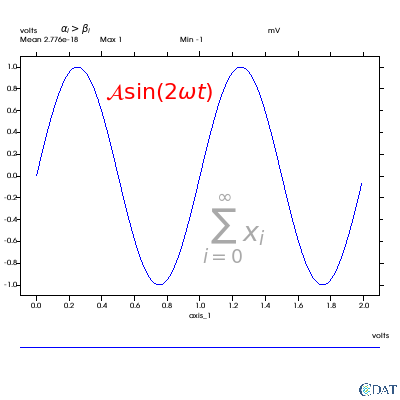

In [15]:
import numpy
import vcs
import cdms2
import MV2

x=vcs.init(bg=True,geometry=(400,400))
a = cdms2.createAxis(numpy.arange(0.0, 2.0, 0.01))
#a.id = "time"
#a.units="second since 2017-09-25"

s = numpy.sin(2*numpy.pi*a[:])
s = cdms2.createVariable(s,axes=[a,])
s.title = r'$\alpha_i > \beta_i$'
s.id = "volts"
s.units="mV"

# Graphic method
y = vcs.create1d()
y.datawc_y1 = -1.1
y.datawc_y2 = 1.1
y.datawc_x1 = -0.1
y.datawc_x2 = 2.1
y.linecolor="blue"
y.markercolor=[0,0,0,0]

# template
t = vcs.createtemplate()
to = vcs.createtextorientation()
to.height = 20
t.title.textorientation = to

x.plot(s,y,t)
text = vcs.createtext()
text.x = [1.2]
text.y = [-.5]
text.string = [r'$\sum_{i=0}^\infty x_i$']
text.height = 55
text.color="dark grey"
text.halign = "center"
# match text viewport to data area
text.viewport = [t.data.x1,t.data.x2,t.data.y1,t.data.y2]
# match text worldcoordinate to data's one
text.worldcoordinate = [y.datawc_x1,y.datawc_x2,y.datawc_y1,y.datawc_y2]
x.plot(text)

text2 = vcs.createtext()
# match text viewport to data area
text2.viewport = [t.data.x1,t.data.x2,t.data.y1,t.data.y2]
# match text worldcoordinate to data's one
text2.worldcoordinate = [y.datawc_x1,y.datawc_x2,y.datawc_y1,y.datawc_y2]
text2.x = [.75]
text2.y = [.75]
text2.halign="center"
text2.height = 45
text2.color= "red"
text2.string = [r'$\mathcal{A}\mathrm{sin}(2 \omega t)$']
x.plot(text2)